In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt 

In [4]:
import pandas as pd

In [5]:
def MakeDoseList_z(filename,Z):

    data_origin = pd.read_csv(filename)
    
    data_dose = data_origin[data_origin['dose']>0].drop(columns = ["ix","iy","iz"])
    data_z = data_origin[data_origin['dose']>0].drop(columns = ["ix","iy","dose"])
    
    deps = np.zeros(Z)
    list_z = np.zeros(Z)
    
    for i in range(len(data_z)):
        deps[data_z.iloc[i]] += data_dose.iloc[i]
    for i in range(Z):
        list_z[i] = 0.2 * i

    return list_z,deps


In [6]:
def MakeDoseList_scorp(filename, Z, scorp_x, scorp_y):
    data_origin = pd.read_csv("pencilbeam.csv")

    data_scorp_y = data_origin[data_origin['iy'] == scorp_y]
    data_scorp_xy = data_scorp_y[data_scorp_y['ix'] == scorp_x].drop(columns = ['ix','iy','iz'])
    
    list_z = np.zeros(Z)
    for i in range(Z):
        list_z[i] = 0.2 * i
    
    return list_z, data_scorp_xy

In [7]:
def MakeColorMap_detector(filename,x,cut_pt):
    boxcell = np.zeros((x,x))
    
    sur_pt = pd.read_csv(filename)
    sur_pt_z = sur_pt[sur_pt['iz'] == cut_pt].drop(columns = ["ix","iy","iz"])
    
    for n in range(x**2):
        i = int(n % x)
        j = int((n - i) / x)
        
        boxcell[i,j] = sur_pt_z.iloc[n]
    
    return boxcell

In [107]:
list1,list2 = MakeDoseList_z("pencilbeam.csv",150)

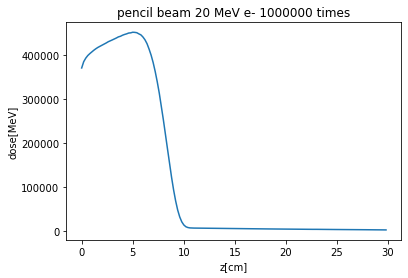

In [146]:
plt.plot(list1,list2)
plt.title("pencil beam 20 MeV e- 1000000 times")
plt.xlabel("z[cm]")
plt.ylabel("dose[MeV]")
plt.savefig("pencilbeam1000000.png")

In [147]:
list3,list4 = MakeDoseList_z("broadbeam.csv", 150)

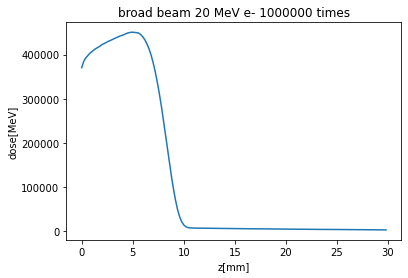

In [148]:
plt.plot(list3,list4)
plt.title("broad beam 20 MeV e- 1000000 times")
plt.xlabel("z[mm]")
plt.ylabel("dose[MeV]")
plt.savefig("broadbeam1000000.png")

In [164]:
list5,list6 = MakeDoseList_scorp("pencilbeam.csv",150,30,30)

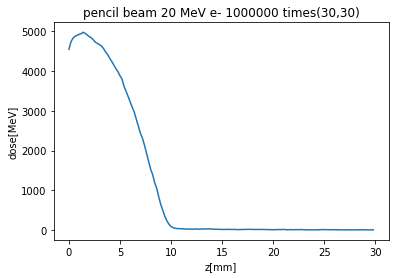

In [165]:
plt.plot(list5,list6)
plt.title("pencil beam 20 MeV e- 1000000 times(30,30)")
plt.xlabel("z[mm]")
plt.ylabel("dose[MeV]")
plt.savefig("pencilbeam1000000(30,30).png")

In [239]:
list7,list8 = MakeDoseList_scorp("broadbeam.csv",150,30,30)

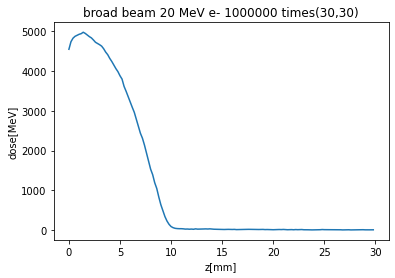

In [240]:
plt.plot(list7,list8)
plt.title("broad beam 20 MeV e- 1000000 times(30,30)")
plt.xlabel("z[mm]")
plt.ylabel("dose[MeV]")
plt.savefig("broadbeam1000000(30,30).png")

In [241]:
boxcell = np.zeros((61,61))

for n in range(61**2):
    i = n % 61
    j = (n-i)/61
    
    boxcell[int(i),int(j)] = sur_pt_z['dose'].iloc[n]

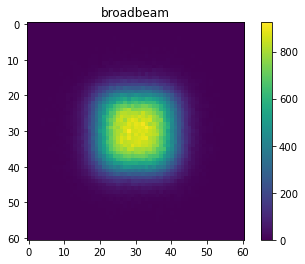

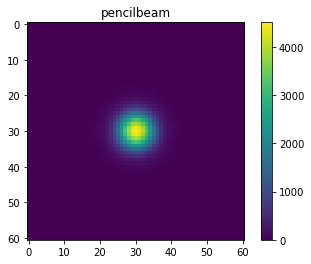

In [29]:
cell = MakeColorMap_detector('broadbeam.csv',61,0)
cell2 = MakeColorMap_detector('pencilbeam.csv',61,0)
plt.imshow(cell)
plt.title("broadbeam")

plt.colorbar()
plt.show()
plt.close()

plt.imshow(cell2)
plt.title("pencilbeam")

plt.colorbar()
plt.show()
plt.close()

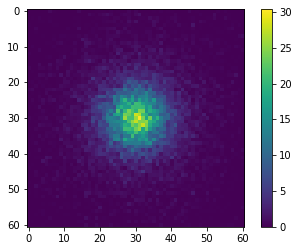

In [9]:
cell2 = MakeColorMap_detector('pencilbeam.csv',61,60)
plt.imshow(cell2)
plt.colorbar()

In [23]:
def MakeColorMap(filename):
    boxcell = np.zeros((61,61))
    
    Points = pd.read_csv(filename)
    
    cell_size = 31/61 
    
    for i in range(61):
        for j in range(61):

            Points_1 = Points[Points['x'] < i + 1]
            Points_2 = Points_1[Points_1['x'] >= i]
            Points_3 = Points_2[Points_2['y'] < j + 1]
            Points_4 = Points_3[Points_3['y'] >= j]
            
            boxcell[i,j] = len(Points_4)
    return boxcell

In [24]:
box_bro = MakeColorMap("SurPts_broadbeam.csv")

In [25]:
box_pen = MakeColorMap("SurPts_pencilbeam.csv")

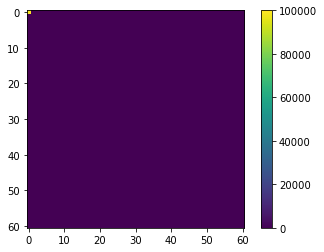

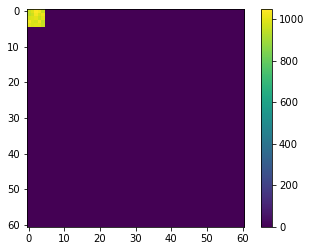

In [26]:
plt.imshow(box_pen)
plt.colorbar()
plt.show()
plt.close()
plt.imshow(box_bro)
plt.colorbar()

In [27]:
print(box_bro - box_pen)

[[-99040.    993.   1048. ...      0.      0.      0.]
 [   945.    970.   1033. ...      0.      0.      0.]
 [   985.    994.   1006. ...      0.      0.      0.]
 ...
 [     0.      0.      0. ...      0.      0.      0.]
 [     0.      0.      0. ...      0.      0.      0.]
 [     0.      0.      0. ...      0.      0.      0.]]
